In [1]:
import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder



In [2]:
file=pd.read_csv(r"C:\Users\User.DESKTOP-OQ6NE4T\Desktop\Telecom_customer_churn\Telecom_customer_churn.csv")
file

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
file.drop(columns='customerID',inplace=True,axis='columns')


In [5]:
file.drop_duplicates(inplace=True)

In [6]:
file['gender']=file['gender'].map({'Male':0,'Female':1})
file['Partner']=file['Partner'].map({'No':0,'Yes':1})
file['Dependents']=file['Dependents'].map({'No':0,'Yes':1})
file['PhoneService']=file['PhoneService'].map({'No':0,'Yes':1})
file['OnlineSecurity']=file['OnlineSecurity'].map({'No':0,'Yes':1})
file['DeviceProtection']=file['DeviceProtection'].map({'No':0,'Yes':1})
file['TechSupport']=file['TechSupport'].map({'No':0,'Yes':1})

file['StreamingTV']=file['StreamingTV'].map({'No':0,'Yes':1})
file['StreamingMovies']=file['StreamingMovies'].map({'No':0,'Yes':1})
file['PaperlessBilling']=file['PaperlessBilling'].map({'No':0,'Yes':1})

file['OnlineBackup']=file['OnlineBackup'].map({'No':0,'Yes':1})

In [7]:
file

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,No
1,0,0,0,0,34,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,No
2,0,0,0,0,2,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,0,0,0,0,45,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,1,0,0,0,2,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.5,No
7039,1,0,1,1,72,1,Yes,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.9,No
7040,1,0,1,1,11,0,No phone service,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,No
7041,0,1,1,0,4,1,Yes,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.6,Yes


In [8]:
file['tenure'] = (file['tenure'] - file['tenure'].min()) / (file['tenure'].max() - file['tenure'].min())
file['MonthlyCharges'] = (file['MonthlyCharges'] - file['MonthlyCharges'].min()) / (file['MonthlyCharges'].max() - file['MonthlyCharges'].min())


In [9]:
###------------------------- Special case ------------------------------###
file['TotalCharges'].replace(" ",np.nan,inplace=True)
file['TotalCharges'].dropna(inplace=True)
file['TotalCharges'] = pd.to_numeric(file['TotalCharges'])
file['TotalCharges'] = (file['TotalCharges'] - file['TotalCharges'].min()) / (file['TotalCharges'].max() - file['TotalCharges'].min())

C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_25112\1468660796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file['TotalCharges'].replace(" ",np.nan,inplace=True)


In [10]:
#file['Contract'].describe
file['Contract'].value_counts()


Contract
Month-to-month    3853
Two year          1695
One year          1473
Name: count, dtype: int64

In [11]:

file['Contract']=file['Contract'].map({'Month-to-month':0,'Two year':1,'One year':2})
# فيه مشكله في one hot encoding




In [12]:
file['MultipleLines'].value_counts()


MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [13]:
file['MultipleLines']=file['MultipleLines'].map({'No':0,'Yes':1,'No phone service':-1})


In [14]:
file['InternetService'].value_counts()


InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64

In [15]:
file['InternetService']=file['InternetService'].map({'Fiber optic':0,'DSL':1,'No':-1})


In [16]:
file['PaymentMethod'].value_counts()


PaymentMethod
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [17]:
file['PaymentMethod']=file['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})


In [18]:
file

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.013889,0,-1,1,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0.115423,0.001275,No
1,0,0,0,0,0.472222,1,0,1,1.0,0.0,1.0,0.0,0.0,0.0,2,0,1,0.385075,0.215867,No
2,0,0,0,0,0.027778,1,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0.354229,0.010310,Yes
3,0,0,0,0,0.625000,0,-1,1,1.0,0.0,1.0,1.0,0.0,0.0,2,0,2,0.239303,0.210241,No
4,1,0,0,0,0.027778,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0.521891,0.015330,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,2,1,1,0.662189,0.227521,No
7039,1,0,1,1,1.000000,1,1,0,0.0,1.0,1.0,0.0,1.0,1.0,2,1,3,0.845274,0.847461,No
7040,1,0,1,1,0.152778,0,-1,1,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0.112935,0.037809,No
7041,0,1,1,0,0.055556,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0.558706,0.033210,Yes


In [19]:
file.isnull().sum()
file.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   float64
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   int64  
 8   OnlineSecurity    5509 non-null   float64
 9   OnlineBackup      5509 non-null   float64
 10  DeviceProtection  5509 non-null   float64
 11  TechSupport       5509 non-null   float64
 12  StreamingTV       5509 non-null   float64
 13  StreamingMovies   5509 non-null   float64
 14  Contract          7021 non-null   int64  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int64  
 17  

In [20]:
## fill nulls with mode of each column
file['OnlineSecurity'].fillna(value=file['OnlineSecurity'].mode()[0],inplace=True)
file['OnlineBackup'].fillna(value=file['OnlineBackup'].mode()[0],inplace=True)
file['DeviceProtection'].fillna(value=file['DeviceProtection'].mode()[0],inplace=True)
file['TechSupport'].fillna(value=file['TechSupport'].mode()[0],inplace=True)
file['StreamingTV'].fillna(value=file['StreamingTV'].mode()[0],inplace=True)
file['StreamingMovies'].fillna(value=file['StreamingMovies'].mode()[0],inplace=True)
file['TotalCharges'].fillna(value=file['TotalCharges'].mode()[0],inplace=True)


C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_25112\1228227443.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file['OnlineSecurity'].fillna(value=file['OnlineSecurity'].mode()[0],inplace=True)
C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_25112\1228227443.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [21]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   float64
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   int64  
 8   OnlineSecurity    7021 non-null   float64
 9   OnlineBackup      7021 non-null   float64
 10  DeviceProtection  7021 non-null   float64
 11  TechSupport       7021 non-null   float64
 12  StreamingTV       7021 non-null   float64
 13  StreamingMovies   7021 non-null   float64
 14  Contract          7021 non-null   int64  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int64  
 17  

In [22]:
features = file.drop(columns=['Churn']) 
labels = file['Churn']


In [23]:
from sklearn.model_selection import train_test_split


In [24]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.8,random_state=100)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_predict=model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: ",accuracy)



Accuracy:  0.7927719423179633


              precision    recall  f1-score   support

          No       0.83      0.90      0.86      4128
         Yes       0.64      0.50      0.56      1489

    accuracy                           0.79      5617
   macro avg       0.74      0.70      0.71      5617
weighted avg       0.78      0.79      0.78      5617

Accuracy: 0.7927719423179633


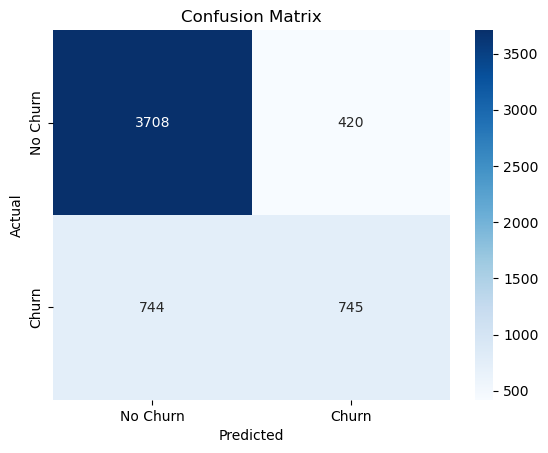

In [29]:
# Print classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_predict))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_predict))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [30]:
from sklearn import svm

In [31]:
model_2=svm.SVC()
model_2.fit(x_train,y_train)

SVC()

In [32]:
model_2.predict(x_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [33]:
model_2=svm.SVC(kernel='linear',degree=2)

In [34]:
model_2.fit(x_train,y_train)

SVC(degree=2, kernel='linear')

In [35]:
model_2.predict(x_test)

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

![Screenshot (216).png](<attachment:Screenshot (216).png>)